In [21]:
with open("One.txt") as mytext:
    words_one = mytext.read().lower().split()
    uni_words_one = set(words_one)

In [23]:
uni_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [25]:
with open("Two.txt") as mytext:
    words_two = mytext.read().lower().split()
    uni_words_two = set(words_two)

In [27]:
uni_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [29]:
all_uni_words = set()
all_uni_words.update(uni_words_one)
all_uni_words.update(uni_words_two)

In [31]:
all_uni_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [33]:
full_vocab = dict()
i = 0

for word in all_uni_words:
    full_vocab[word] = i
    i = i + 1

In [35]:
full_vocab

{'sport': 0,
 'is': 1,
 'this': 2,
 'a': 3,
 'waves': 4,
 'surfing': 5,
 'popular': 6,
 'are': 7,
 'dogs': 8,
 'fun': 9,
 'about': 10,
 'animals': 11,
 'pets': 12,
 'story': 13,
 'canine': 14,
 'catching': 15,
 'furry': 16,
 'water': 17,
 'our': 18}

In [37]:
one_freq = [0] * len(full_vocab)
two_freq = [0] * len(full_vocab)
all_words = [""] * len(full_vocab)

In [39]:
one_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
with open("One.txt", "r") as f:
    one_text = f.read().lower().split()

In [45]:
for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind] += 1

In [47]:
one_freq

[0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]

In [49]:
with open("Two.txt", "r") as f:
    two_text = f.read().lower().split()

In [51]:
two_text

['this',
 'story',
 'is',
 'about',
 'surfing',
 'catching',
 'waves',
 'is',
 'fun',
 'surfing',
 'is',
 'a',
 'popular',
 'water',
 'sport']

In [53]:
for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind] += 1

In [55]:
two_freq

[1, 3, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]

In [57]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [59]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word 

In [61]:
all_words

['sport',
 'is',
 'this',
 'a',
 'waves',
 'surfing',
 'popular',
 'are',
 'dogs',
 'fun',
 'about',
 'animals',
 'pets',
 'story',
 'canine',
 'catching',
 'furry',
 'water',
 'our']

In [67]:
import pandas as pd
bow = pd.DataFrame(data=[one_freq, two_freq], columns=all_words)

In [70]:
bow

,sport,is,this,a,waves,surfing,popular,are,dogs,fun,about,animals,pets,story,canine,catching,furry,water,our
0,0,1,1,1,0,0,0,1,2,0,1,1,1,1,1,0,1,0,1
1,1,3,1,1,1,2,1,0,0,1,1,0,0,1,0,1,0,1,0


In [72]:
text = ["This is a line", "This is another line", "Completely different line"]

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [76]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |
 |  Convert a collection of text documents to a matrix of token counts.
 |
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_auto_examp

In [100]:
cv = CountVectorizer()

In [102]:
sparse_matrix = cv.fit_transform(text)

In [104]:
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [106]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [108]:
tfidf = TfidfTransformer()

In [112]:
results = tfidf.fit_transform(sparse_matrix)

In [116]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
tv = TfidfVectorizer()

In [124]:
tv_results = tv.fit_transform(text)

In [128]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("../DATA/airline_tweets.csv")

In [138]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

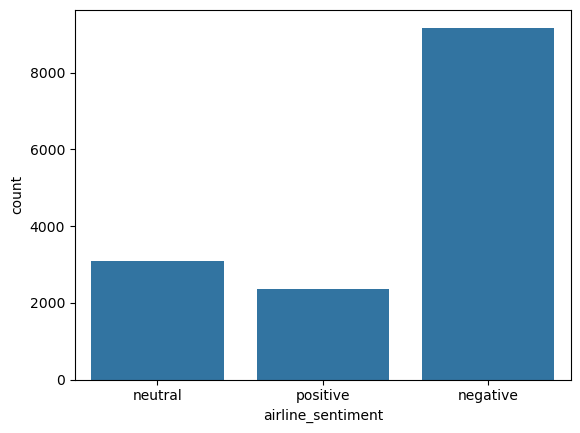

In [140]:
sns.countplot(data=df, x="airline_sentiment")

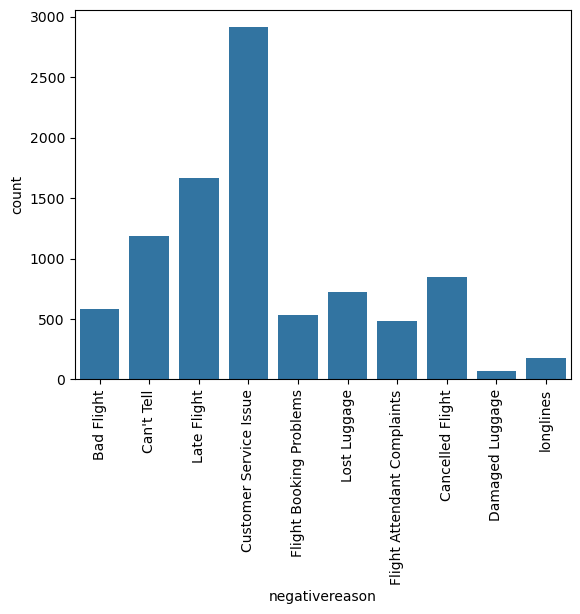

In [146]:
sns.countplot(data=df, x="negativereason")
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

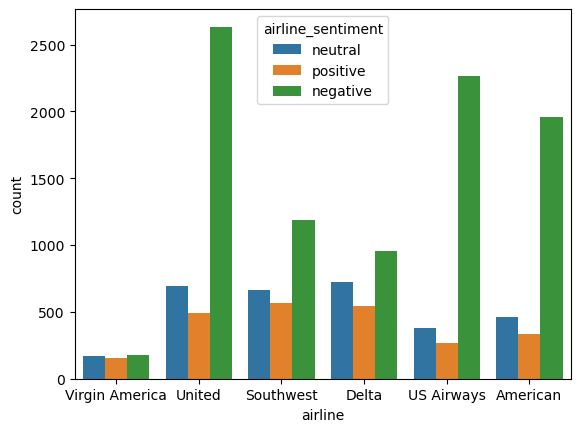

In [150]:
sns.countplot(data=df, x="airline", hue="airline_sentiment")

In [152]:
data = df[["airline_sentiment", "text"]]

In [154]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [156]:
X = data["text"]

In [158]:
y = data["airline_sentiment"]

In [160]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [164]:
tfidf = TfidfVectorizer(stop_words="english")

In [166]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [218]:
X_trained_tfidf = tfidf.transform(X_train)

In [220]:
X_test_tfidf = tfidf.transform(X_test)

In [222]:
X_trained_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [174]:
from sklearn.naive_bayes import MultinomialNB

In [176]:
nb = MultinomialNB()

In [178]:
nb.fit(X_trained_tfidf, y_train)

MultinomialNB()

In [180]:
from sklearn.linear_model import LogisticRegression

In [184]:
log_model = LogisticRegression(max_iter=1000)

In [186]:
log_model.fit(X_trained_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [188]:
from sklearn.svm import SVC, LinearSVC

In [190]:
rbf_svc = SVC()
rbf_svc.fit(X_trained_tfidf, y_train)

SVC()

In [191]:
linear_svc = LinearSVC()

In [194]:
linear_svc.fit(X_trained_tfidf, y_train)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [198]:
from sklearn.metrics import confusion_matrix, classification_report

In [200]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    confusion_matrix(y_test, preds)

In [204]:
from sklearn.pipeline import Pipeline

In [206]:
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])

In [208]:
pipe.fit(X, y)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [228]:
pipe.predict(["ok flight"])

array(['neutral'], dtype=object)